In [32]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import sys

%matplotlib notebook

from run_utils import run_env_experiment, plot_ratings_mses

sys.path.append('../') 
from reclab.environments.latent_factors import DatasetLatentFactor, LatentFactorBehavior

from reclab.recommenders import LibFM
from reclab.recommenders import KNNRecommender
from reclab.recommenders import TopPop
from reclab.recommenders import RandomRec
from reclab.recommenders import PerfectRec



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Exploration with Different User Behaviors

In this notebook, for a fixed level of model and user behavior complexity, we illustrate how epsilon-greedy exploration strategies compare for static and dynamin user models.

In [33]:
## Key Parameters across all settings
expdirname = 'baselines'
bucket_name = None
data_dir = None


num_users = 100
num_items = 1000

env_params = {
    'num_users': num_users,
    'num_items': num_items,
    'rating_frequency': 0.5,
    'num_init_ratings': 0
}

exp_params = {
    'len_trial': 10,
    'trial_seeds': np.arange(1),
}
num_init_ratings = 1000

In [34]:

recommenders_base = [
    LibFM(
        num_user_features=0,
        num_item_features=0,
        num_rating_features=0,
        max_num_users=num_users,
        max_num_items=num_items,
        method='sgd',
        learning_rate=0.01,
    ),
    RandomRec(
    ),
    TopPop(
    ),
] 
recommender_names = ['libfm', 'random', 'toppop', 'perfect']
# recommenders_base = []

## Static User Behavior

Here, the user model does not change over time. 

In [35]:
params = {'latent_dim': 8}
env_params_dataset = {key:env_params[key] for key in env_params.keys() if key not in ['num_users', 'num_items']}
for key in ['num_users', 'num_items']:
    env_params_dataset['max_'+key] = env_params[key]
env = DatasetLatentFactor('ml-100k', **params, **env_params_dataset)

def get_rating(env):
    def func(user_id, item_id):
        ratings = env.dense_ratings
        return ratings[user_id, item_id]
    return func

recommenders = recommenders_base + [PerfectRec(get_rating(env))]

datafilename = 'static_2'+env.name+'.npz'

ratings, preds, dense_ratings, dense_preds = run_env_experiment(environments=[env],
                                                                recommenders=recommenders,
                                                                **exp_params,
                                                                bucket_name=bucket_name,
                                                                data_dir=data_dir,
                                                                overwrite=False)


Started experiments on environment: latent-ml-100k_0
Running trials for recommender: libfm_0
Running trial with seed: 0
Loading model from ../reclab/../data/ml-100k/fm_model.npz trained via:
{"num_user_features": 0, "num_item_features": 0, "num_rating_features": 0, "max_num_users": 943, "max_num_items": 1682, "method": "sgd", "use_global_bias": true, "use_one_way": true, "num_two_way_factors": 8, "learning_rate": 0.005, "bias_reg": 0.1, "one_way_reg": 0.1, "two_way_reg": 0.1, "init_stdev": 0.1, "num_iter": 100, "seed": 0, "kwargs": {}}.



Running trials for recommender: random_0
Running trial with seed: 0
Loading model from ../reclab/../data/ml-100k/fm_model.npz trained via:
{"num_user_features": 0, "num_item_features": 0, "num_rating_features": 0, "max_num_users": 943, "max_num_items": 1682, "method": "sgd", "use_global_bias": true, "use_one_way": true, "num_two_way_factors": 8, "learning_rate": 0.005, "bias_reg": 0.1, "one_way_reg": 0.1, "two_way_reg": 0.1, "init_stdev": 0.1, "num_iter": 100, "seed": 0, "kwargs": {}}.



Running trials for recommender: top-pop_0
Running trial with seed: 0
Loading model from ../reclab/../data/ml-100k/fm_model.npz trained via:
{"num_user_features": 0, "num_item_features": 0, "num_rating_features": 0, "max_num_users": 943, "max_num_items": 1682, "method": "sgd", "use_global_bias": true, "use_one_way": true, "num_two_way_factors": 8, "learning_rate": 0.005, "bias_reg": 0.1, "one_way_reg": 0.1, "two_way_reg": 0.1, "init_stdev": 0.1, "num_iter": 100, "seed": 0, "kwargs": {}}.


(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)
(1, 1000)

Running trials for recommender: perfect_0
Running trial with seed: 0
Loading model from ../reclab/../data/ml-100k/fm_model.npz trained via:
{"num_user_features": 0, "num_item_features": 0, "num_rating_features": 0, "max_num_users": 943, "max_num_items": 1682, "method": "sgd", "use_global_bias": true, "use_one_way": true, "num_two_way_factors": 8, "learning_rate": 0.005, "bias_reg": 0.1, "one_way_reg": 0.1, "two_way_reg": 0.1, "init_stdev": 0.1, "num_iter": 100, "seed": 0, "kwargs": {}}.


<IPython.core.display.Javascript object>


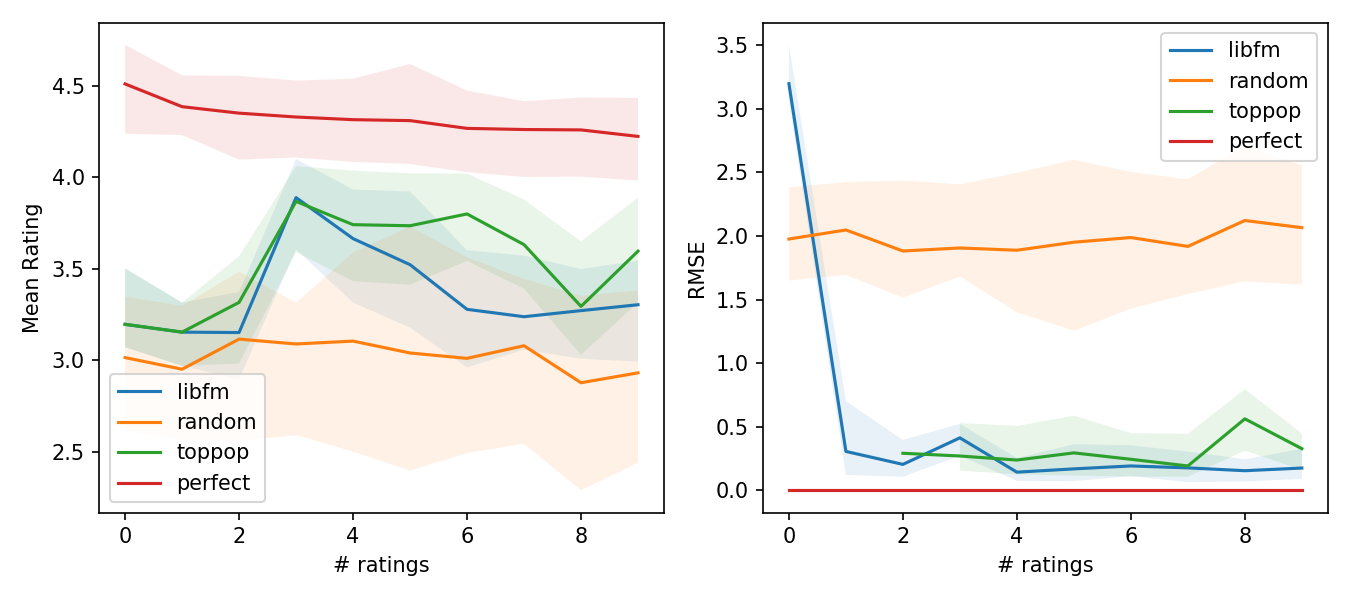

In [36]:
plot_ratings_mses(ratings[0], preds[0], recommender_names, summary_type='median')

In [37]:
params = {'latent_dim': 8}

env = LatentFactorBehavior(**params, **env_params)

def get_rating(env):
    def func(user_id, item_id):
        ratings = env.dense_ratings
        return ratings[user_id, item_id]
    return func

recommenders = recommenders_base + [PerfectRec(get_rating(env))]


ratings, preds, dense_ratings, dense_preds = run_env_experiment(environments=[env],
                                                                recommenders=recommenders,
                                                                **exp_params,
                                                                bucket_name=bucket_name,
                                                                data_dir=data_dir,
                                                                overwrite=False)


Started experiments on environment: latent_0
Running trials for recommender: libfm_0
Running trial with seed: 0



Running trials for recommender: random_0
Running trial with seed: 0



Running trials for recommender: top-pop_0
Running trial with seed: 0



Running trials for recommender: perfect_0
Running trial with seed: 0


<IPython.core.display.Javascript object>


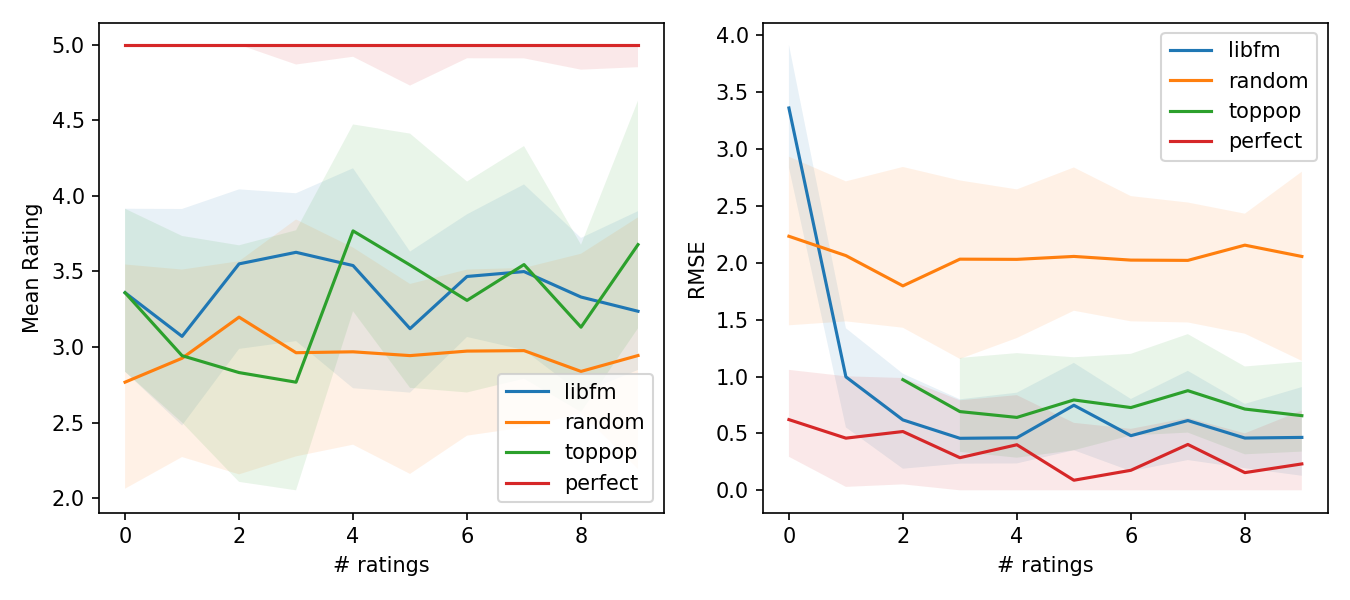

In [38]:
plot_ratings_mses(ratings[0], preds[0], recommender_names, summary_type='median')